# Initial Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. LQC files

In [2]:
lqc_files = ['MC348-3ST1 Appomattox NE_LQC.csv','MC391-1 Appomattox SW_LQC.csv','MC392-1 Appomattox SE_LQC.csv',
            'MC392-1ST1 Appomattox SE_LQC.csv','MC393-1 Vicksburg A_LQC.csv','MC525-2 Rydberg Deep_LQC.csv',
            'MC612-1BP1 Dover_LQC.csv']

In [27]:
# CHECK IF COLUMNS ARE THE SAME IN ALL FILES
df_standard = pd.read_csv('csv/MC348-3ST1 Appomattox NE_LQC.csv', dtype='str')
cols_all = []
for file in lqc_files:
    df = pd.read_csv('csv/' + file, dtype='str')
    cols_all.extend(df.columns.tolist())
    print('Columns in ' + file + ':')
    print(sorted(df.columns.tolist()))
    print('Difference from 3ST1:')
    print('\t' + 'Extra columns:', [i for i in df.columns.tolist() if i not in df_standard.columns.tolist()])
    print('\t' + 'Missing columns:', [i for i in df_standard.columns.tolist() if i not in df.columns.tolist()])
    print('*'*50 + '\n')
print('ALL FILES:')
print(sorted(list(set(cols_all))))

Columns in MC348-3ST1 Appomattox NE_LQC.csv:
['DENSITY', 'DTC', 'DTS', 'FLD', 'GR', 'MD', 'NEUTRON', 'NMR_BW', 'NMR_CBW', 'NMR_FF', 'NMR_TPOR', 'RDEEP', 'RMEDIUM', 'TVD', 'TVDBML', 'TVDSS', 'datasetName', 'wellName']
Difference from 3ST1:
	Extra columns: []
	Missing columns: []
**************************************************

Columns in MC391-1 Appomattox SW_LQC.csv:
['DENSITY', 'DTC', 'DTS', 'FLD', 'GR', 'MD', 'NEUTRON', 'NMR_BW', 'NMR_CBW', 'NMR_FF', 'NMR_TPOR', 'RDEEP', 'TVD', 'TVDBML', 'TVDSS', 'datasetName', 'wellName']
Difference from 3ST1:
	Extra columns: []
	Missing columns: ['RMEDIUM']
**************************************************

Columns in MC392-1 Appomattox SE_LQC.csv:
['DENSITY', 'DTC', 'DTS', 'FLD', 'GR', 'MD', 'NEUTRON', 'NMR_BW', 'NMR_CBW', 'NMR_FF', 'NMR_TPOR', 'RDEEP', 'RSHALLOW', 'TVD', 'TVDBML', 'TVDSS', 'datasetName', 'wellName']
Difference from 3ST1:
	Extra columns: ['RSHALLOW']
	Missing columns: ['RMEDIUM']
***********************************************

__Matt Knuth: use only RDEEP. Therefore, missing RSHALLOW or RMEDIUM columns above have no effect__

#### Intervals of interest

We only have a single reservoir of interest at the base of the section and aren’t trying to draw any conclusions about the overburden sections.

__MD up to cutoffs__
* MC348-3ST1:25654
* MC391-1: 25402
* MC392-1: 24463
* MC392-1ST1: 25987
* MC393-1: 25378
* MC525-2: 25113
* MC612-1BP1: 27611

Below the main Norphlet we sometimes find a section of non-reservoir rock that you can identify with high resistivity and high GR.  Below that is the Louann salt, easily identifiable by very low GR and very high resistivity.  At the moment we are better off not looking at either.

__MD down to cutoffs__
* MC348-3ST1: 25834
* MC391-1: 26080
* MC392-1: 24990
* MC392-1ST1: 26809
* MC393-1: 26385
* MC525-2: 26101
* MC612-1BP1: 28695


In [4]:
interval = [25654, 25834]
df_3st1 = pd.read_csv('csv/MC348-3ST1 Appomattox NE_LQC.csv', dtype='str')
df_3st1 = df_3st1.rename(columns = {'MD': 'MD, ft',
                                    'DENSITY': 'DENSITY, g/cm3',
                                    'DTC': 'DTC, us/ft',
                                    'DTS': 'DTS, US/F',
                                    'FLD': 'FLD, unitless',
                                    'GR': 'GR, gAPI',
                                    'NEUTRON': 'NEUTRON, CFCF',
                                    'NMR_BW': 'NMR_BW, v/v',
                                    'NMR_CBW': 'NMR_CBW, v/v',
                                    'NMR_FF': 'NMR_FF, v/v',
                                    'NMR_TPOR': 'NMR_TPOR, v/v',
                                    'RDEEP': 'RDEEP, ohm.m',
                                    'RMEDIUM': 'RMEDIUM, ohm.m',
                                    'TVD': 'TVD, ft',
                                    'TVDBML': 'TVDBML, ft',
                                    'TVDSS': 'TVDSS, ft'})
df_3st1 = df_3st1.drop(0)

In [5]:
df_3st1 = df_3st1.replace(np.nan, 'None')
df_3st1 = df_3st1.replace('-9999', np.nan)

In [9]:
df_3st1 = df_3st1.apply(pd.to_numeric, errors='ignore')
df_3st1.dtypes

wellName           object
datasetName        object
MD, ft            float64
DENSITY, g/cm3    float64
DTC, us/ft        float64
DTS, US/F         float64
FLD, unitless     float64
GR, gAPI          float64
NEUTRON, CFCF     float64
NMR_BW, v/v       float64
NMR_CBW, v/v      float64
NMR_FF, v/v       float64
NMR_TPOR, v/v     float64
RDEEP, ohm.m      float64
RMEDIUM, ohm.m    float64
TVD, ft           float64
TVDBML, ft        float64
TVDSS, ft         float64
dtype: object

In [68]:
print('Size:', df_3st1.shape)
df_3st1.isna().sum()

Size: (106401, 18)


wellName               0
datasetName            0
MD, ft                 0
DENSITY, g/cm3     75622
DTC, us/ft         72832
DTS, US/F          87173
FLD, unitless     105666
GR, gAPI           33944
NEUTRON, CFCF      87928
NMR_BW, v/v       104866
NMR_CBW, v/v      104866
NMR_FF, v/v       104866
NMR_TPOR, v/v     104866
RDEEP, ohm.m       34097
RMEDIUM, ohm.m     34097
TVD, ft                0
TVDBML, ft             0
TVDSS, ft              0
dtype: int64

In [66]:
df_3st1.head()

,wellName,datasetName,"MD, ft","DENSITY, g/cm3","DTC, us/ft","DTS, US/F","FLD, unitless","GR, gAPI","NEUTRON, CFCF","NMR_BW, v/v","NMR_CBW, v/v","NMR_FF, v/v","NMR_TPOR, v/v","RDEEP, ohm.m","RMEDIUM, ohm.m","TVD, ft","TVDBML, ft","TVDSS, ft"
1,MC348-3ST1 Appomattox NE,LQC,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-7331.00,-75.00
2,MC348-3ST1 Appomattox NE,LQC,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,-7330.75,-74.75
3,MC348-3ST1 Appomattox NE,LQC,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,-7330.50,-74.50
4,MC348-3ST1 Appomattox NE,LQC,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,-7330.25,-74.25
5,MC348-3ST1 Appomattox NE,LQC,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,-7330.00,-74.00


In [13]:
df_3st1 = df_3st1[(df_3st1['MD, ft'] >= interval[0]) & (df_3st1['MD, ft'] <= interval[1])]

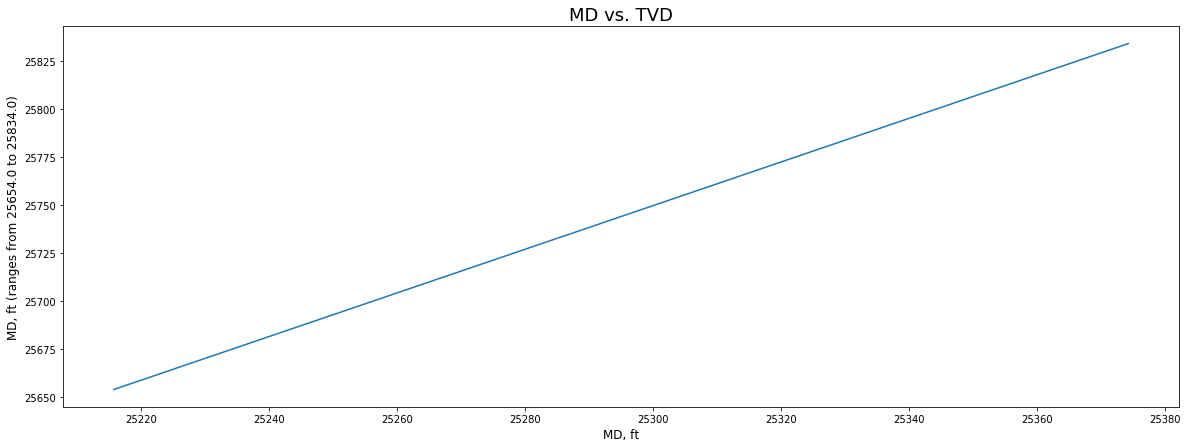

**************************************************



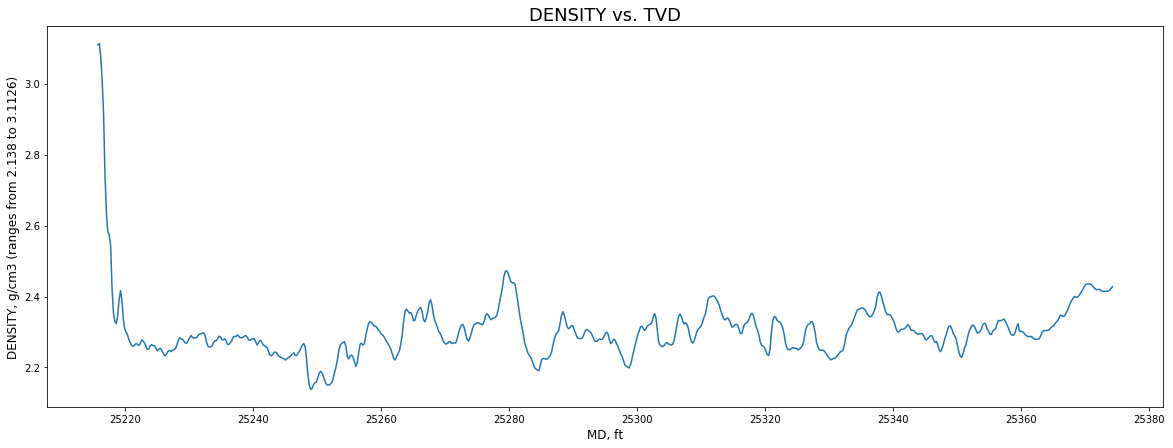

**************************************************



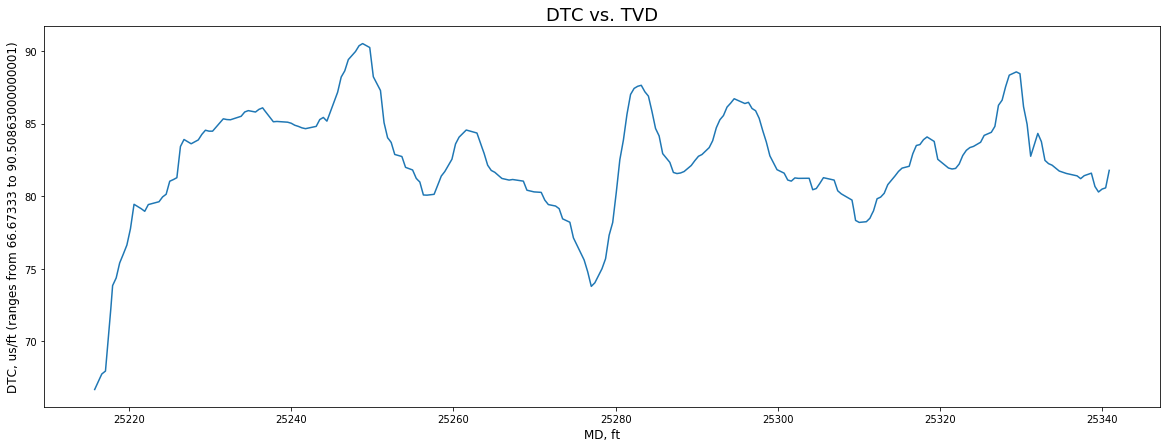

**************************************************



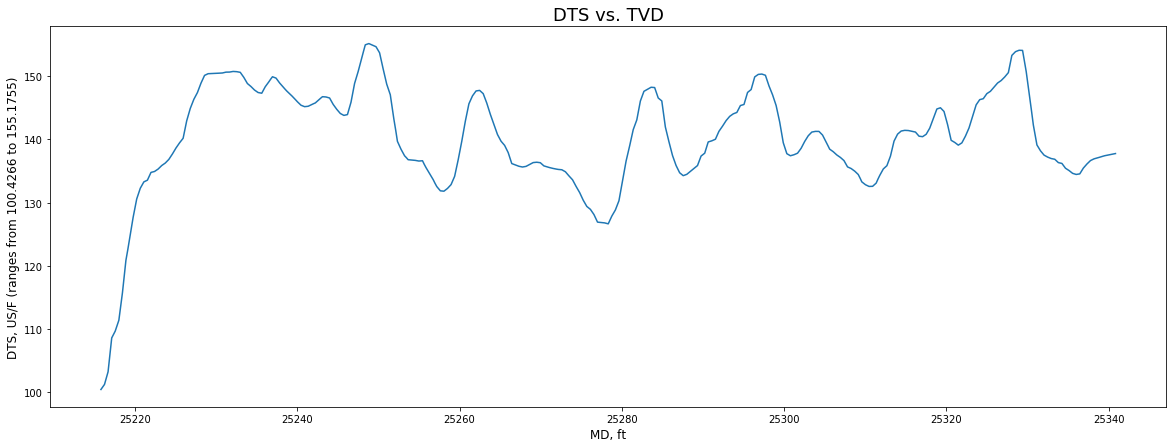

**************************************************



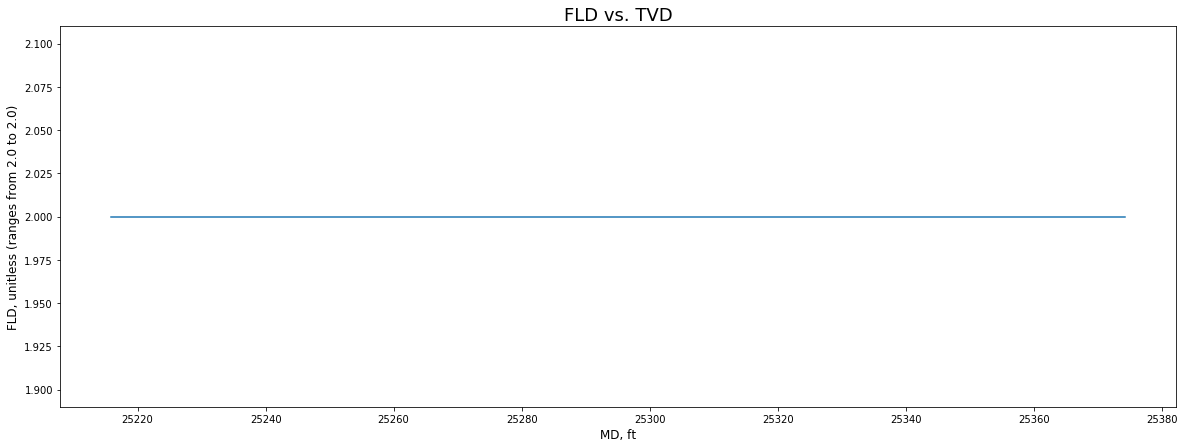

**************************************************



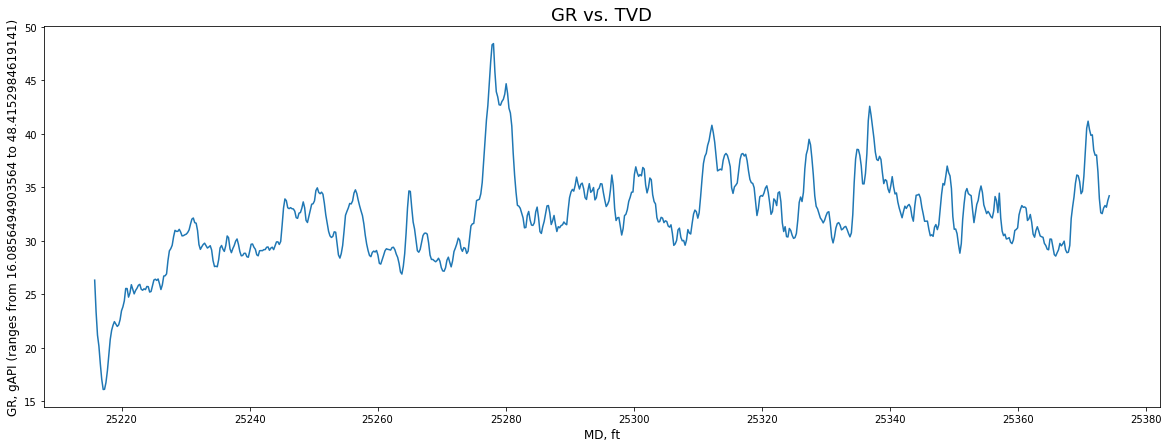

**************************************************



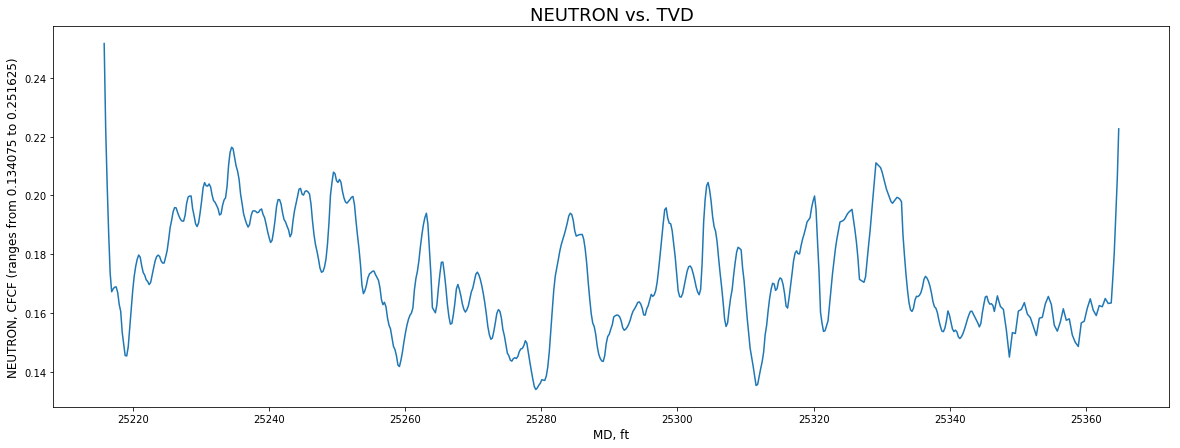

**************************************************



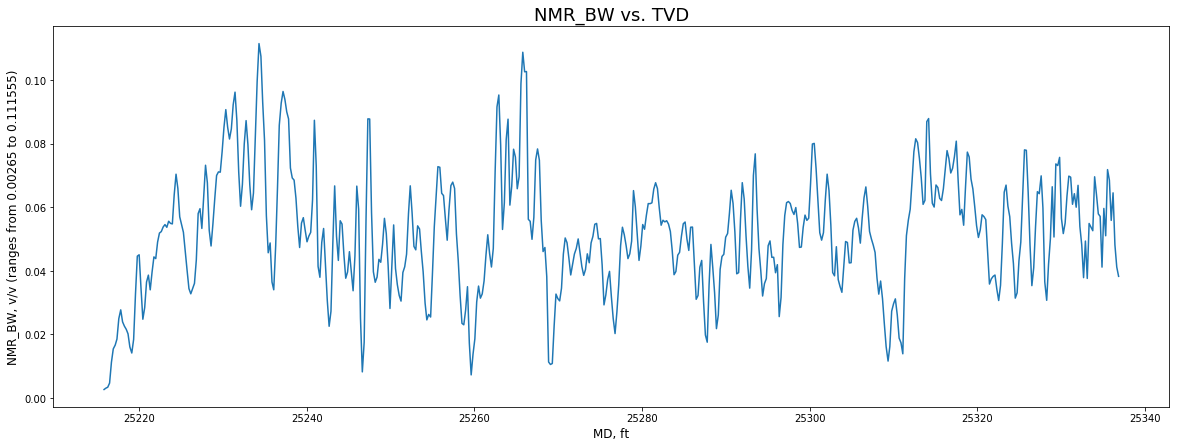

**************************************************



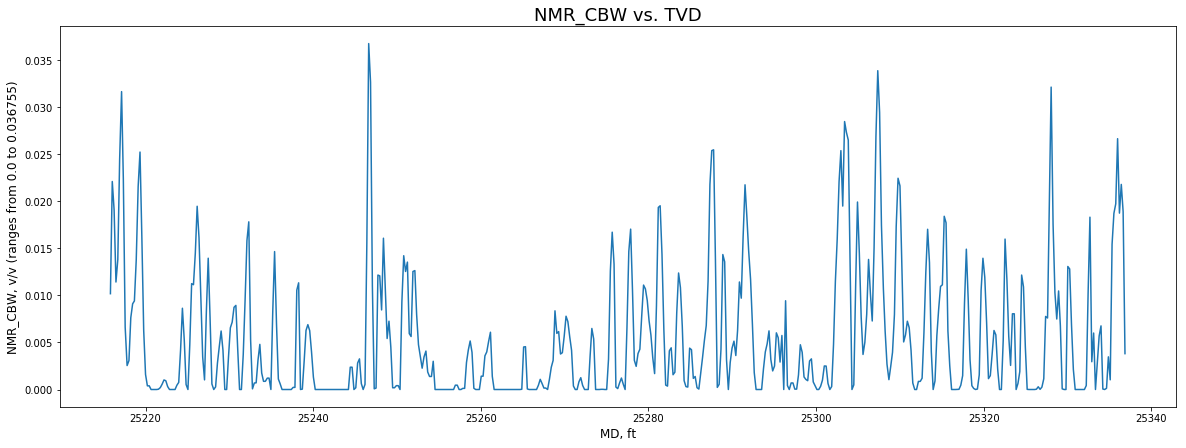

**************************************************



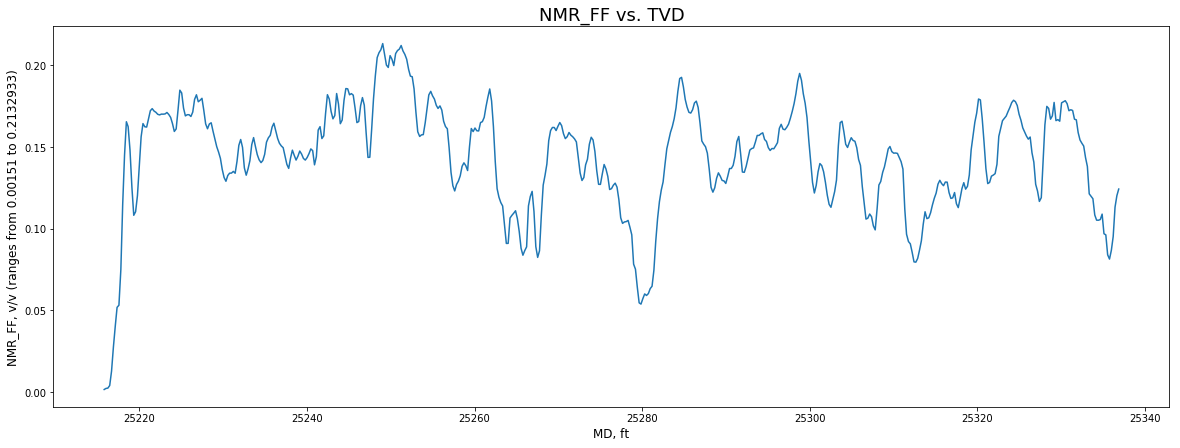

**************************************************



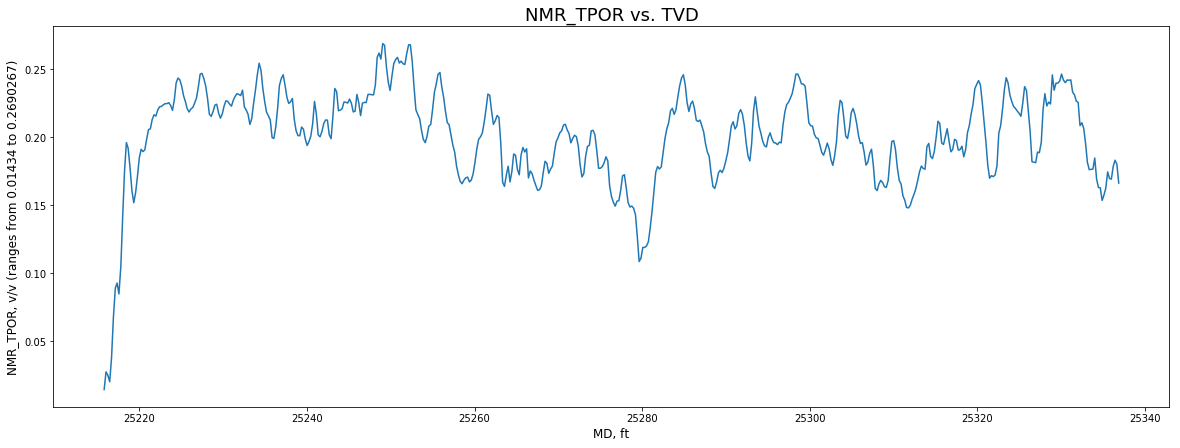

**************************************************



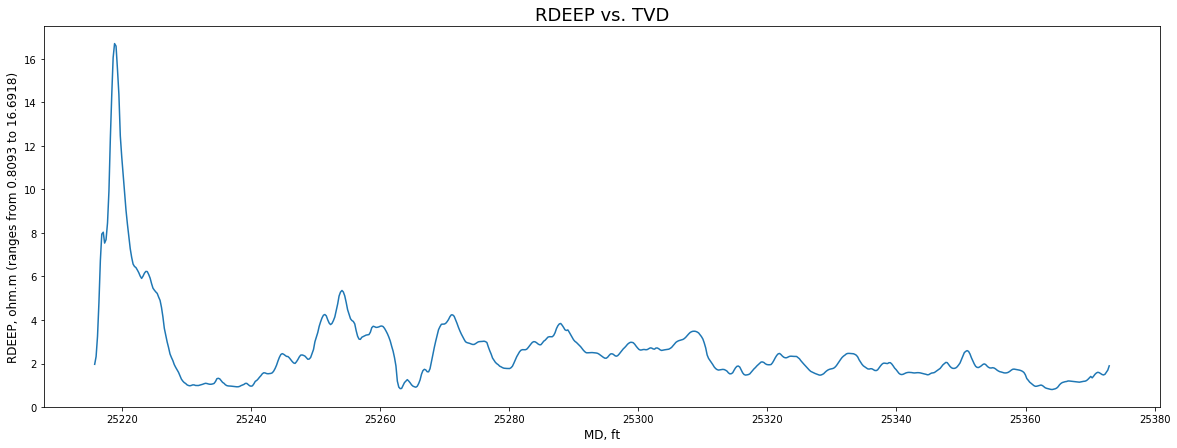

**************************************************



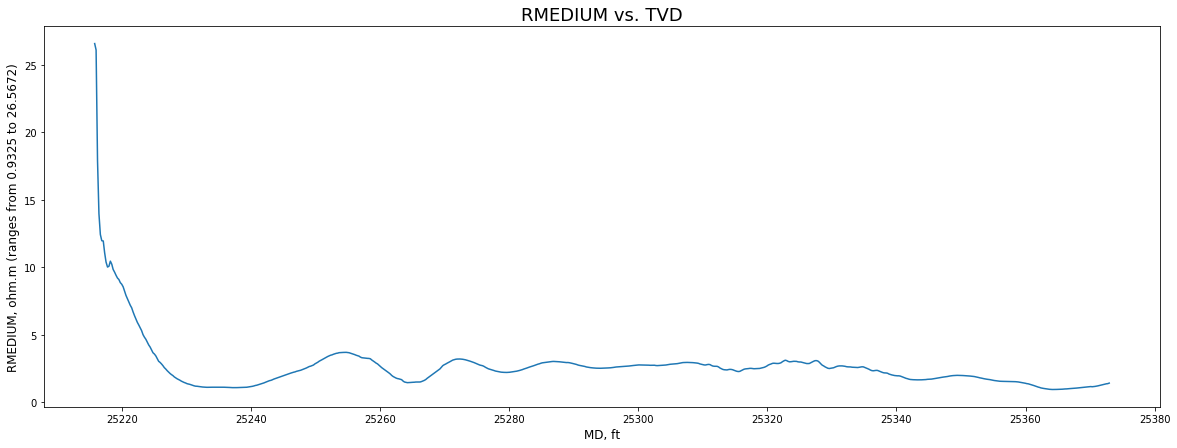

**************************************************



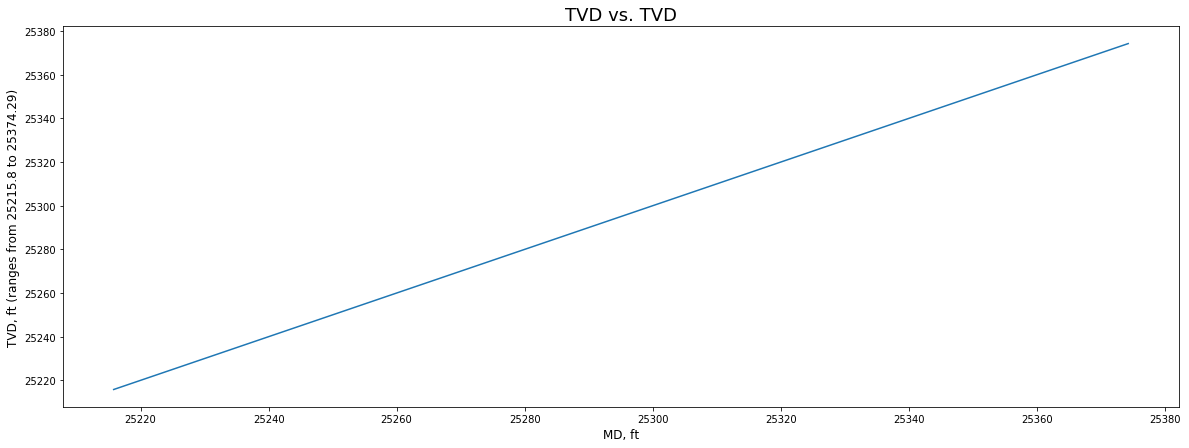

**************************************************



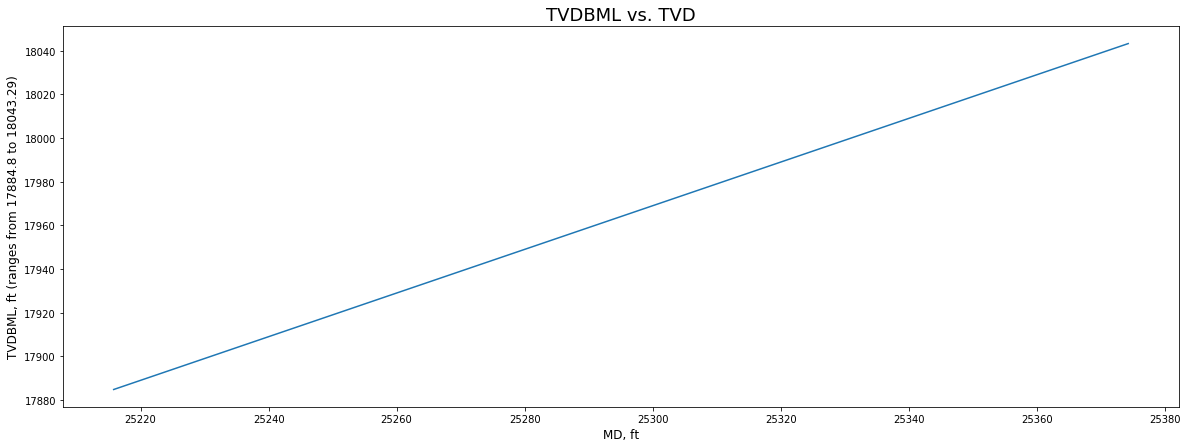

**************************************************



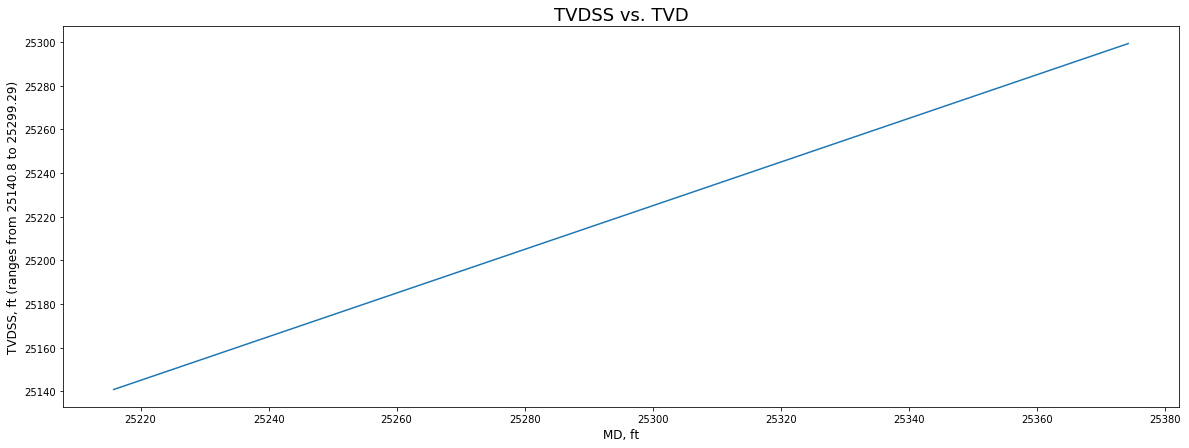

**************************************************



In [15]:
for col in df_3st1.columns[2:]:
    
    mini = df_3st1[col].min()
    maxi = df_3st1[col].max()
    
    plt.figure(figsize=(20,7))
    plt.xlabel('MD, ft', fontsize=12)
    plt.ylabel('{} (ranges from {} to {})'.format(col, mini, maxi), fontsize=12)
    plt.title(col.split(',')[0] + ' vs. TVD', fontsize=18)
    plt.plot(df_3st1['TVD, ft'].tolist(), df_3st1[col].values)
    plt.show()
    print('*'*50 + '\n')

## INDEX files (contain mostly depths and offsets - will probably not be used)

In [16]:
index_files = ['MC348-3ST1 Appomattox NE_Index.csv', 'MC391-1 Appomattox SW_Index.csv', 'MC392-1 Appomattox SE_Index.csv',
              'MC392-1ST1 Appomattox SE_Index.csv','MC393-1 Vicksburg A_Index.csv','MC525-2 Rydberg Deep_Index.csv',
              'MC612-1BP1 Dover_Index.csv']

In [17]:
# CHECK IF COLUMNS ARE THE SAME ALL FILES
cols_all = []
for file in index_files:
    df = pd.read_csv('csv/' + file, dtype='str')
    cols_all.extend(df.columns.tolist())
    print('Columns in ' + file + ':')
    print(sorted(df.columns.tolist()))
    print('*'*50 + '\n')
print('ALL FILES:')
print(sorted(list(set(cols_all))))

Columns in MC348-3ST1 Appomattox NE_Index.csv:
['CD', 'MD', 'TVD', 'TVDBML', 'TVDSS', 'XOFFSET', 'YOFFSET', 'datasetName', 'wellName']
**************************************************

Columns in MC391-1 Appomattox SW_Index.csv:
['BOREHOLE_AZIMUTH', 'BOREHOLE_DEVIATION', 'CD', 'MD', 'TVD', 'TVDBML', 'TVDSS', 'XOFFSET', 'YOFFSET', 'datasetName', 'wellName']
**************************************************

Columns in MC392-1 Appomattox SE_Index.csv:
['CD', 'MD', 'TVD', 'TVDBML', 'TVDSS', 'XOFFSET', 'YOFFSET', 'datasetName', 'wellName']
**************************************************

Columns in MC392-1ST1 Appomattox SE_Index.csv:
['CD', 'MD', 'TVD', 'TVDBML', 'TVDSS', 'XOFFSET', 'YOFFSET', 'datasetName', 'wellName']
**************************************************

Columns in MC393-1 Vicksburg A_Index.csv:
['CD', 'MD', 'TVD', 'TVDBML', 'TVDSS', 'XOFFSET', 'YOFFSET', 'datasetName', 'wellName']
**************************************************

Columns in MC525-2 Rydberg Deep_In

'BOREHOLE_AZIMUTH' and 'BOREHOLE_DEVIATION' are encountered only in one index file - discard?

In [19]:
df_3st1i = pd.read_csv('csv/MC348-3ST1 Appomattox NE_Index.csv', dtype='str')
print(sorted(df_3st1i.columns.tolist()))

['CD', 'MD', 'TVD', 'TVDBML', 'TVDSS', 'XOFFSET', 'YOFFSET', 'datasetName', 'wellName']


In [20]:
df_3st1i = df_3st1i.rename(columns = {'MD': 'MD, ft',
                                      'CD': 'CD, ft',
                                      'TVD': 'TVD, ft',
                                      'TVDBML': 'TVDBML, ft',
                                      'TVDSS': 'TVDSS, ft',
                                      'XOFFSET': 'XOFFSET, ft',
                                      'YOFFSET': 'YOFFSET, ft'})
df_3st1i = df_3st1i.drop(0)
df_3st1i = df_3st1i.apply(pd.to_numeric, errors='ignore')

In [23]:
df_3st1i = df_3st1i[(df_3st1i['MD, ft'] >= interval[0]) & (df_3st1i['MD, ft'] <= interval[1])]

In [24]:
df_3st1i

,wellName,datasetName,"MD, ft","CD, ft","TVD, ft","TVDBML, ft","TVDSS, ft","XOFFSET, ft","YOFFSET, ft"
102617,MC348-3ST1 Appomattox NE,Index,25654.00,25650.00,25215.834,17884.833337,25140.833665,-1262.496601,-1308.517673
102618,MC348-3ST1 Appomattox NE,Index,25654.25,25650.25,25216.053,17885.053368,25141.053696,-1262.581812,-1308.600289
102619,MC348-3ST1 Appomattox NE,Index,25654.50,25650.50,25216.273,17885.273398,25141.273726,-1262.667024,-1308.682906
102620,MC348-3ST1 Appomattox NE,Index,25654.75,25650.75,25216.494,17885.493428,25141.493756,-1262.752237,-1308.765522
102621,MC348-3ST1 Appomattox NE,Index,25655.00,25651.00,25216.713,17885.713458,25141.713786,-1262.837452,-1308.848139
102622,MC348-3ST1 Appomattox NE,Index,25655.25,25651.25,25216.934,17885.933486,25141.933815,-1262.922669,-1308.930755
102623,MC348-3ST1 Appomattox NE,Index,25655.50,25651.50,25217.154,17886.153515,25142.153843,-1263.007887,-1309.013371
102624,MC348-3ST1 Appomattox NE,Index,25655.75,25651.75,25217.373,17886.373543,25142.373871,-1263.093107,-1309.095987
102625,MC348-3ST1 Appomattox NE,Index,25656.00,25652.00,25217.594,17886.593570,25142.593898,-1263.178328,-1309.178603
102626,MC348-3ST1 Appomattox NE,Index,25656.25,25652.25,25217.814,17886.813596,25142.813924,-1263.263550,-1309.261219


In [25]:
df_3st1i.isna().sum()

wellName       0
datasetName    0
MD, ft         0
CD, ft         0
TVD, ft        0
TVDBML, ft     0
TVDSS, ft      0
XOFFSET, ft    0
YOFFSET, ft    0
dtype: int64

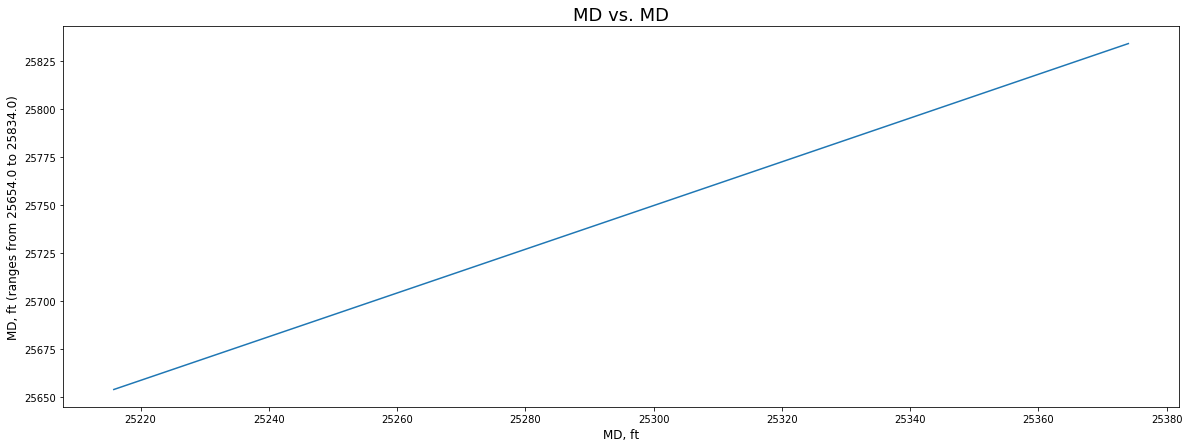

**************************************************



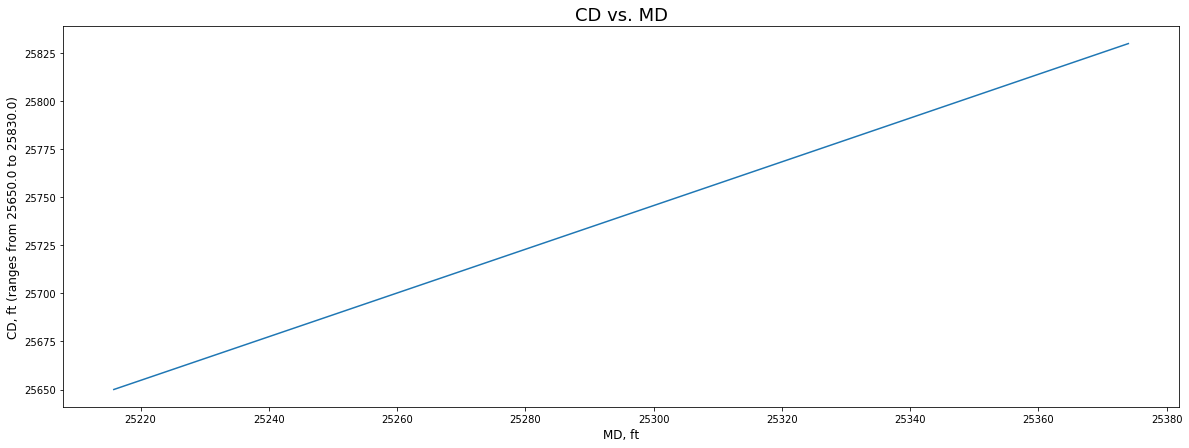

**************************************************



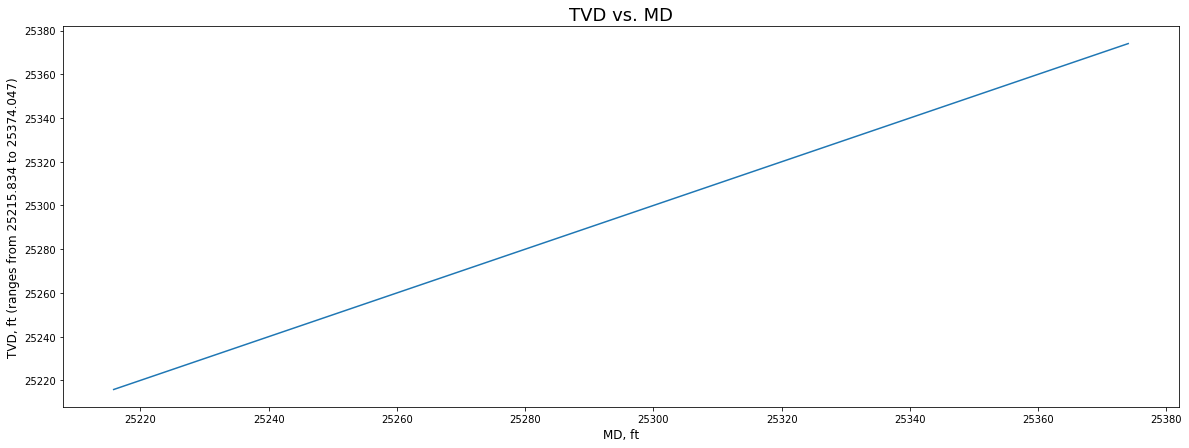

**************************************************



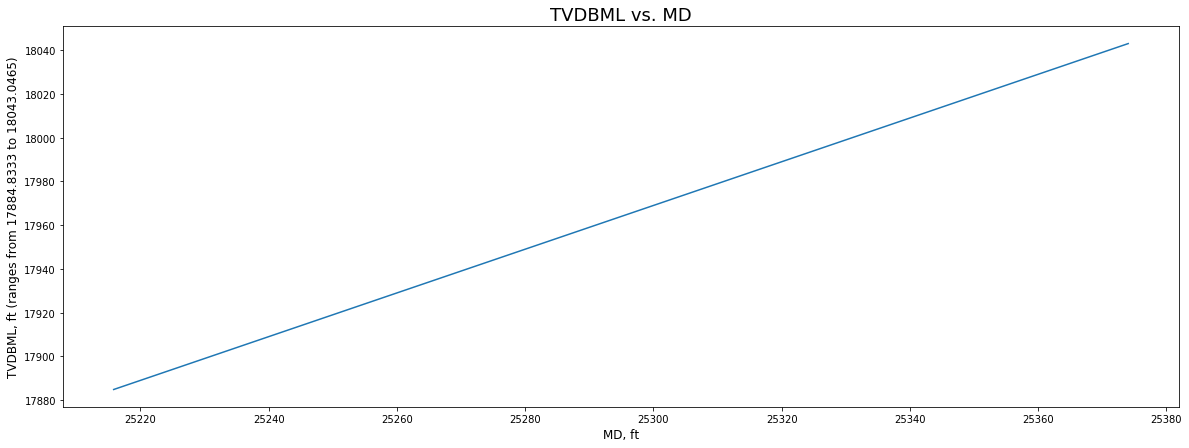

**************************************************



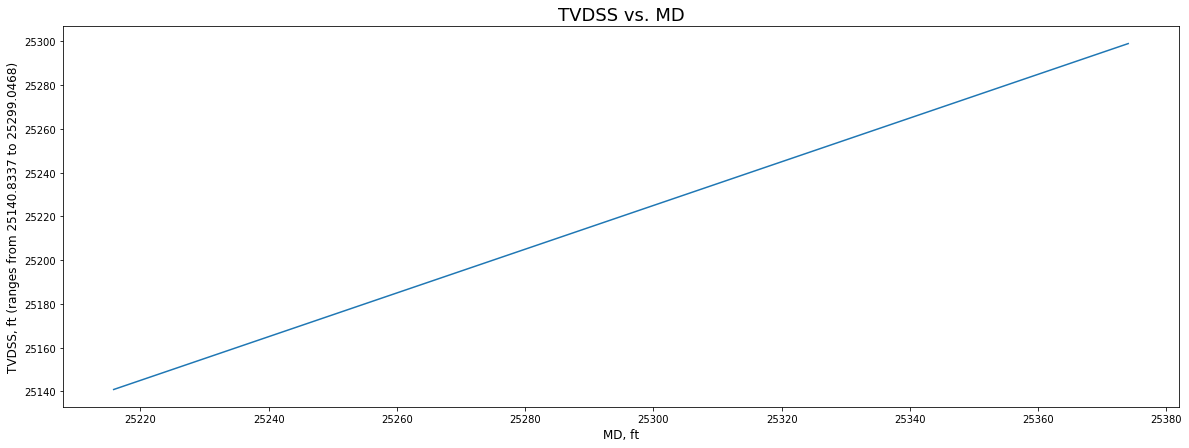

**************************************************



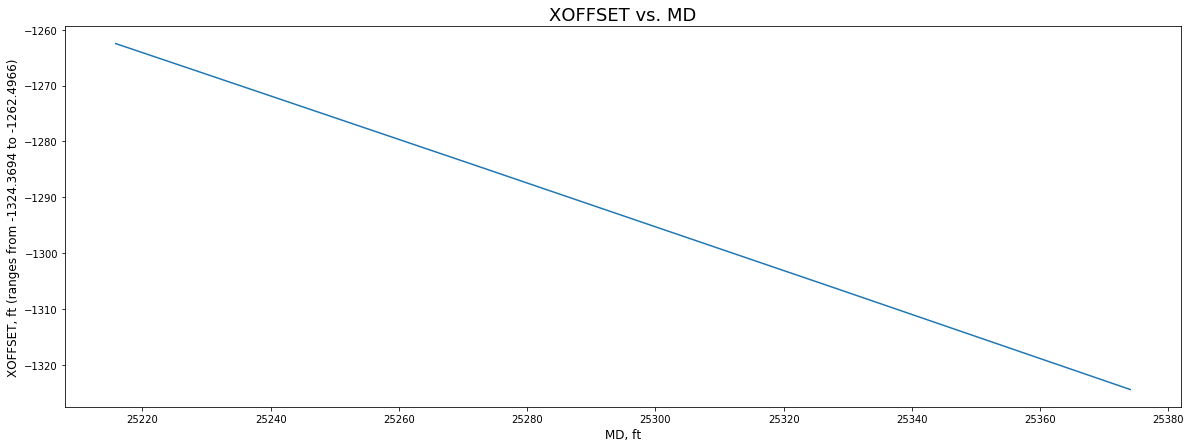

**************************************************



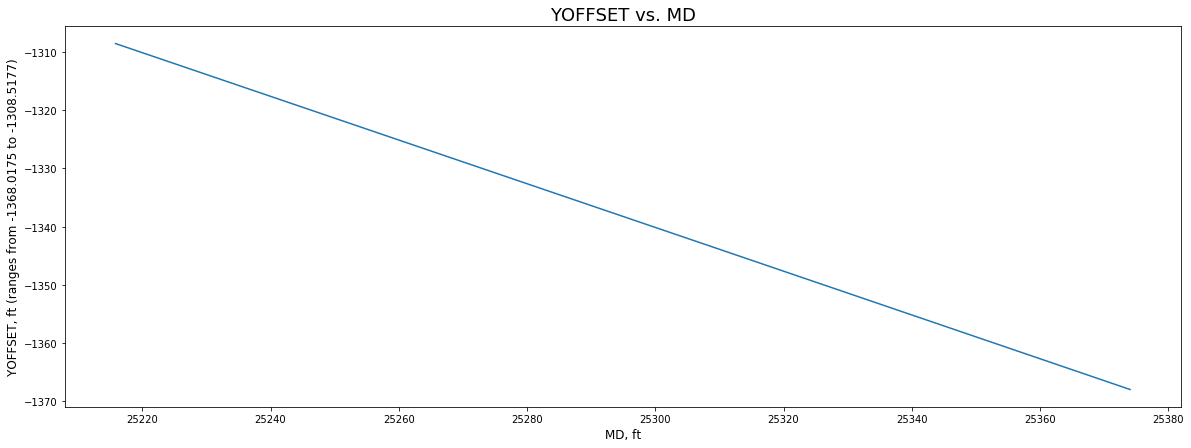

**************************************************



In [26]:
for col in df_3st1i.columns[2:]:
    
    mini = round(df_3st1i[col].min(), 4)
    maxi = round(df_3st1i[col].max(), 4)
    
    plt.figure(figsize=(20,7))
    plt.xlabel('MD, ft', fontsize=12)
    plt.ylabel('{} (ranges from {} to {})'.format(col, mini, maxi), fontsize=12)
    plt.title(col.split(',')[0] + ' vs. MD', fontsize=18)
    plt.plot(df_3st1i['TVD, ft'].tolist(), df_3st1i[col].values)
    plt.show()
    print('*'*50 + '\n')